# Dogs breeds

https://youtu.be/JNxcznsrRb8?t=1h31m8s

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [5]:
torch.cuda.set_device(0)

Kaggle Dog Breed Identification. Get data from https://www.kaggle.com/c/dog-breed-identification

In [6]:
PATH = "data/drugs/pics/"
sz = 224
arch = resnext101_64
bs = 150
label_csv = f'{PATH}5labels.csv'
n = len(list(open(label_csv))) - 1 # header is not counted (-1)
val_idxs = get_cv_idxs(n, seed=random.sample(range(9), 1)) # random 20% data for validation set
print(len(val_idxs))
print(val_idxs[0:5])

1805
[7348 7358 8293 6898 1468]


## Initial model

In [7]:
def get_data(sz, bs): # sz: image size, bs: batch size
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}5labels.csv',
                                       val_idxs=val_idxs, suffix='.png', tfms=tfms, bs=bs)
    
    # http://forums.fast.ai/t/how-to-train-on-the-full-dataset-using-imageclassifierdata-from-csv/7761/13
    # http://forums.fast.ai/t/how-to-train-on-the-full-dataset-using-imageclassifierdata-from-csv/7761/37
    return data if sz > 300 else data.resize(340, 'tmp') # Reading the jpgs and resizing is slow for big images, so resizing them all to 340 first saves time


In [8]:
def k_fold_cross_loop1(k, epochs):
    validation_accuracy = []
    for reps in range(k):
        val_idxs = get_cv_idxs(n, seed=random.sample(range(1000), 1)) # random 20% data for validation set
        data = get_data(sz, bs)
        learn = ConvLearner.pretrained(arch, data, precompute=True)
        learn.fit(1e-2, epochs)
        validation_accuracy.append(val_acc)
        learn.save(str(reps)+'_5cls_100epochs_10fold.model')
    return validation_accuracy

In [9]:
v_a = k_fold_cross_loop1(10,100)


100%|██████████| 13/13 [00:16<00:00,  1.23s/it]


epoch      trn_loss   val_loss   accuracy                 
    0      1.453737   1.192425   0.513573  
    1      1.261324   1.130666   0.542936                 
    2      1.173712   1.102371   0.552355                 
    3      1.115144   1.060745   0.563989                 
    4      1.058528   1.05111    0.576731                 
    5      1.017212   1.016641   0.596122                 
    6      0.983419   1.000995   0.597784                  
    7      0.949759   1.019241   0.586704                  
    8      0.933433   0.978841   0.606648                  
    9      0.916181   0.968044   0.6                       
    10     0.885175   0.956123   0.616066                  
    11     0.855921   0.963197   0.607202                  
    12     0.843555   0.947487   0.625485                  
    13     0.823425   0.940084   0.617729                  
    14     0.82074    0.945169   0.623823                  
    15     0.813485   0.951876   0.626593                  
  

epoch      trn_loss   val_loss   accuracy                 
    0      1.435978   1.191013   0.528532  
    1      1.259555   1.126087   0.551801                 
    2      1.168455   1.088987   0.564543                 
    3      1.110963   1.064261   0.575069                 
    4      1.082567   1.043541   0.578393                 
    5      1.031799   1.027778   0.583934                 
    6      0.990865   1.024378   0.58892                   
    7      0.960475   0.986113   0.60277                   
    8      0.936463   0.976815   0.607202                  
    9      0.918873   0.985702   0.598338                  
    10     0.902272   0.972813   0.606648                  
    11     0.875664   0.958221   0.617729                  
    12     0.854179   0.94199    0.621607                  
    13     0.835289   0.949644   0.611634                  
    14     0.818458   0.931321   0.618837                  
    15     0.795712   0.957112   0.609972                  
  

epoch      trn_loss   val_loss   accuracy                 
    0      1.449755   1.204397   0.515789  
    1      1.266147   1.130048   0.541274                 
    2      1.182086   1.09911    0.563989                 
    3      1.112089   1.070741   0.570083                 
    4      1.066852   1.044317   0.582825                 
    5      1.017027   1.038918   0.578947                 
    6      0.987067   1.018178   0.576731                  
    7      0.965997   1.00328    0.590028                  
    8      0.932846   0.985203   0.595014                  
    9      0.896889   0.994886   0.593352                  
    10     0.886875   0.96919    0.598338                  
    11     0.873911   0.964345   0.607202                  
    12     0.852308   0.984549   0.590582                  
    13     0.838381   0.97029    0.613296                  
    14     0.822073   0.969307   0.603878                  
    15     0.804821   0.945439   0.609418                  
  

epoch      trn_loss   val_loss   accuracy                 
    0      1.464083   1.208488   0.511357  
    1      1.288544   1.14095    0.547922                 
    2      1.179604   1.094628   0.559003                 
    3      1.108967   1.106958   0.562881                 
    4      1.072471   1.050951   0.589474                 
    5      1.029483   1.024861   0.593906                 
    6      0.993524   1.025369   0.585042                  
    7      0.969257   1.002562   0.599446                  
    8      0.937731   1.032065   0.59723                   
    9      0.913873   0.989749   0.596122                  
    10     0.899232   0.970221   0.604986                  
    11     0.868562   0.967643   0.618283                  
    12     0.85711    0.9885     0.604986                  
    13     0.856812   0.957274   0.627147                  
    14     0.838489   0.94693    0.615512                  
    15     0.815874   0.929725   0.629363                  
  

epoch      trn_loss   val_loss   accuracy                 
    0      1.483433   1.192393   0.519114  
    1      1.273407   1.127804   0.550139                 
    2      1.178998   1.086767   0.565097                 
    3      1.117812   1.0625     0.563989                 
    4      1.063685   1.035295   0.588366                 
    5      1.017804   1.018083   0.592244                 
    6      0.990713   1.013706   0.593352                  
    7      0.958264   0.991607   0.604986                  
    8      0.936636   0.977431   0.603878                  
    9      0.922905   0.964425   0.619391                  
    10     0.89677    0.957924   0.614958                  
    11     0.861026   0.960189   0.615512                  
    12     0.847653   0.960656   0.618283                  
    13     0.842672   0.960857   0.603878                  
    14     0.82206    0.93711    0.630471                  
    15     0.799239   0.944109   0.619391                  
  

epoch      trn_loss   val_loss   accuracy                 
    0      1.485251   1.205142   0.516898  
    1      1.287252   1.127601   0.544044                 
    2      1.182445   1.080826   0.568421                 
    3      1.112742   1.061405   0.580609                 
    4      1.065648   1.035139   0.586704                 
    5      1.027398   1.020375   0.584488                 
    6      0.992094   0.998234   0.59169                   
    7      0.95735    0.995158   0.595568                  
    8      0.929153   0.97771    0.601662                  
    9      0.905245   0.987492   0.603324                  
    10     0.885759   0.967437   0.609972                  
    11     0.879775   0.945648   0.61662                   
    12     0.86067    0.950527   0.619391                  
    13     0.840969   0.958225   0.604986                  
    14     0.827933   0.938758   0.616621                  
    15     0.806501   0.935663   0.615512                  
  

epoch      trn_loss   val_loss   accuracy                 
    0      1.448337   1.17817    0.522438  
    1      1.262692   1.122295   0.53795                  
    2      1.179152   1.086029   0.560111                 
    3      1.115934   1.064727   0.565651                 
    4      1.054823   1.041695   0.583379                 
    5      1.021591   1.017115   0.583934                 
    6      1.001829   1.003367   0.585042                  
    7      0.968975   1.00414    0.595568                  
    8      0.934482   0.972935   0.610526                  
    9      0.901933   0.977588   0.609418                  
    10     0.885743   0.959408   0.616066                  
    11     0.864866   0.956279   0.596676                  
    12     0.836384   0.956098   0.607756                  
    13     0.825167   0.947683   0.618283                  
    14     0.802258   0.958186   0.614958                  
    15     0.784135   0.94501    0.612188                  
  

epoch      trn_loss   val_loss   accuracy                 
    0      1.46901    1.193592   0.515789  
    1      1.27166    1.13195    0.545706                 
    2      1.161394   1.096765   0.554571                 
    3      1.110665   1.068394   0.559003                 
    4      1.0682     1.045939   0.568421                 
    5      1.012707   1.020403   0.58338                  
    6      0.9899     1.00296    0.596122                  
    7      0.957521   0.999634   0.59723                   
    8      0.932254   1.009313   0.588366                  
    9      0.906389   0.990916   0.598892                  
    10     0.880872   0.974144   0.609418                  
    11     0.860778   0.97046    0.598338                  
    12     0.849024   0.966147   0.604986                  
    13     0.830127   0.960109   0.606648                  
    14     0.80753    0.967436   0.61662                   
    15     0.799862   0.961381   0.61662                   
  

epoch      trn_loss   val_loss   accuracy                 
    0      1.450675   1.198882   0.511357  
    1      1.252108   1.123809   0.553463                 
    2      1.159139   1.105156   0.566205                 
    3      1.095903   1.085495   0.555125                 
    4      1.043053   1.046639   0.580055                 
    5      1.010764   1.035548   0.576177                 
    6      0.989334   1.020852   0.586704                  
    7      0.963382   0.989686   0.597784                  
    8      0.931072   0.994938   0.586704                  
    9      0.909348   0.982661   0.60554                   
    10     0.896112   0.986347   0.606094                  
    11     0.875287   0.956724   0.609418                  
    12     0.848471   0.960649   0.609418                  
    13     0.825577   0.953573   0.614958                  
    14     0.812466   0.956719   0.60554                   
    15     0.792842   0.955655   0.617175                  
  

epoch      trn_loss   val_loss   accuracy                 
    0      1.448377   1.19827    0.512465  
    1      1.260635   1.139456   0.53518                  
    2      1.160187   1.087548   0.555125                 
    3      1.106586   1.08163    0.568975                 
    4      1.059978   1.053443   0.572853                 
    5      1.024749   1.023159   0.59169                  
    6      0.987546   1.00249    0.59446                   
    7      0.953851   0.989516   0.598892                  
    8      0.9244     1.002914   0.592798                  
    9      0.910369   0.984229   0.590582                  
    10     0.886778   0.967978   0.604432                  
    11     0.865767   0.971817   0.615512                  
    12     0.84273    0.951153   0.608864                  
    13     0.826171   0.956957   0.623269                  
    14     0.802958   0.953071   0.618837                  
    15     0.7815     0.946917   0.622715                  
  

In [10]:
valacc = [0.65651,0.6604,0.64432,0.64598,0.6437,0.653186,0.647645,0.65706,0.643767,0.648199]
print('mean='+str(np.mean(valacc)))
print('stdev.='+str(np.std(valacc)))

mean=0.6500767
stdev.=0.005884115754299874


### Precompute

In [11]:
plt.rcParams['figure.figsize'] = [5, 5]

In [12]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
adj = cm.transpose()/cm.sum(axis=1)

adj = adj.round(2)
plot_confusion_matrix(adj.transpose(), data.classes)

NameError: name 'learn' is not defined

### Augment

In [45]:
from sklearn import metrics

In [46]:
data = get_data(sz, bs)

In [47]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

In [51]:
learn.fit(1e-2, 2000)

epoch      trn_loss   val_loss   accuracy                  
    0      0.381579   0.977774   0.652632  
    1      0.362424   0.979615   0.650416                  
    2      0.363948   0.988909   0.649861                  
    3      0.371648   0.974583   0.65097                   
    4      0.375591   0.997509   0.655956                  
    5      0.38825    0.979243   0.652078                  
    6      0.370741   0.976403   0.652632                  
    7      0.364548   0.977965   0.65097                   
    8      0.361835   0.991816   0.65097                   
    9      0.374712   0.993832   0.648199                  
    10     0.374453   1.003261   0.657064                  
    11     0.373121   0.992282   0.655402                  
    12     0.379622   0.970048   0.652078                  
    13     0.372552   0.979644   0.65374                   
    14     0.366194   0.98446    0.650416                  
    15     0.357217   0.97559    0.654848               

   135     0.302131   1.048499   0.655956                  
   136     0.304496   1.037207   0.655402                  
   137     0.309104   1.039357   0.655956                  
   138     0.312144   1.0509     0.659834                  
   139     0.307933   1.032783   0.660942                  
   140     0.301661   1.046336   0.657618                  
   141     0.31559    1.039839   0.65928                   
   142     0.308919   1.066562   0.655956                  
   143     0.303886   1.058882   0.657064                  
   144     0.301976   1.0549     0.653186                  
   145     0.309965   1.047844   0.649861                  
   146     0.313892   1.047496   0.658726                  
   147     0.301082   1.03653    0.65928                   
   148     0.314161   1.068915   0.654848                  
   149     0.318754   1.068736   0.658726                  
   150     0.317649   1.048159   0.657618                  
   151     0.308812   1.05318    0.65651

   271     0.274488   1.089899   0.658172                  
   272     0.278951   1.08695    0.652078                  
   273     0.281021   1.090979   0.652632                  
   274     0.273799   1.076919   0.654848                  
   275     0.274681   1.072251   0.654848                  
   276     0.272769   1.08456    0.655956                  
   277     0.284091   1.085562   0.654848                  
   278     0.27002    1.086529   0.654294                  
   279     0.276945   1.07707    0.657064                  
   280     0.284735   1.077788   0.655402                  
   281     0.282628   1.093159   0.65651                   
   282     0.287715   1.081808   0.658172                  
   283     0.290332   1.065614   0.65651                   
   284     0.290318   1.062093   0.658726                  
   285     0.290602   1.093878   0.655956                  
   286     0.286211   1.088038   0.658172                  
   287     0.27633    1.084798   0.65595

   407     0.257119   1.094365   0.657618                  
   408     0.260886   1.093307   0.658172                  
   409     0.256483   1.082794   0.66205                   
   410     0.25957    1.095834   0.660388                  
   411     0.265248   1.090835   0.660942                  
   412     0.27267    1.091967   0.662604                  
   413     0.26994    1.091017   0.659834                  
   414     0.260466   1.101549   0.660388                  
   415     0.261771   1.112733   0.65928                   
   416     0.261383   1.114799   0.660942                  
   417     0.262625   1.11041    0.659834                  
   418     0.256523   1.122247   0.654848                  
   419     0.260066   1.119649   0.660942                  
   420     0.257761   1.123025   0.663712                  
   421     0.260087   1.107542   0.661496                  
   422     0.267938   1.114301   0.660942                  
   423     0.262047   1.110315   0.66038

   543     0.249842   1.143816   0.660942                  
   544     0.243487   1.145889   0.663158                  
   545     0.246567   1.14141    0.657618                  
   546     0.247439   1.153994   0.659834                  
   547     0.242045   1.148695   0.664266                  
   548     0.241566   1.133472   0.660942                  
   549     0.243321   1.131676   0.66205                   
   550     0.246008   1.132066   0.660942                  
   551     0.251169   1.139823   0.657618                  
   552     0.246319   1.168876   0.658172                  
   553     0.251232   1.163611   0.660942                  
   554     0.250612   1.157071   0.661496                  
   555     0.255529   1.163597   0.660942                  
   556     0.253638   1.150667   0.657064                  
   557     0.247509   1.145745   0.658172                  
   558     0.251132   1.128768   0.655956                  
   559     0.252195   1.131849   0.65928

   679     0.25294    1.163014   0.659834                  
   680     0.246492   1.172273   0.662604                  
   681     0.242886   1.177355   0.660388                  
   682     0.247874   1.173682   0.660942                  
   683     0.240619   1.17583    0.663712                  
   684     0.24754    1.179474   0.660388                  
   685     0.248372   1.167617   0.65928                   
   686     0.252111   1.171364   0.660942                  
   687     0.24269    1.168883   0.661496                  
   688     0.252243   1.162776   0.659834                  
   689     0.249951   1.172488   0.66205                   
   690     0.243272   1.172799   0.65928                   
   691     0.234198   1.172194   0.662604                  
   692     0.246961   1.183528   0.65928                   
   693     0.250498   1.177973   0.660942                  
   694     0.251303   1.163655   0.662604                  
   695     0.253019   1.175343   0.66315

   815     0.250439   1.181799   0.660388                  
   816     0.258019   1.180085   0.658726                  
   817     0.255183   1.173952   0.660388                  
   818     0.254133   1.176585   0.660942                  
   819     0.24211    1.174311   0.65928                   
   820     0.243052   1.165652   0.658172                  
   821     0.241802   1.178274   0.65928                   
   822     0.247421   1.184121   0.660388                  
   823     0.243676   1.189842   0.663712                  
   824     0.242889   1.186723   0.660388                  
   825     0.242348   1.175952   0.660942                  
   826     0.236334   1.16754    0.660388                  
   827     0.234544   1.172152   0.663712                  
   828     0.224027   1.17028    0.660942                  
   829     0.229296   1.180581   0.661496                  
   830     0.238175   1.180813   0.657618                  
   831     0.230227   1.189562   0.66038

   951     0.237042   1.172766   0.661496                  
   952     0.234774   1.165052   0.661496                  
   953     0.229201   1.176885   0.664266                  
   954     0.240216   1.179889   0.66205                   
   955     0.244386   1.176504   0.66759                   
   956     0.254148   1.162154   0.662604                  
   957     0.243497   1.14334    0.665374                  
   958     0.234618   1.166816   0.669806                  
   959     0.242556   1.177689   0.665928                  
   960     0.239226   1.173526   0.65928                   
   961     0.244607   1.166703   0.665928                  
   962     0.24603    1.162792   0.66205                   
   963     0.247605   1.161058   0.67036                   
   964     0.245084   1.164309   0.669806                  
   965     0.241896   1.159026   0.665374                  
   966     0.241834   1.16271    0.668698                  
   967     0.234709   1.184321   0.65706

   1087    0.234904   1.223876   0.664266                  
   1088    0.232571   1.20994    0.664266                  
   1089    0.221397   1.202641   0.668144                  
   1090    0.217383   1.203907   0.66759                   
   1091    0.223032   1.215136   0.664266                  
   1092    0.226074   1.217499   0.668144                  
   1093    0.227403   1.20655    0.668144                  
   1094    0.229039   1.196023   0.669252                  
   1095    0.229244   1.205338   0.665374                  
   1096    0.241202   1.2051     0.666482                  
   1097    0.233899   1.197874   0.663158                  
   1098    0.236117   1.223693   0.658172                  
   1099    0.229691   1.207336   0.660388                  
   1100    0.235664   1.221065   0.662604                  
   1101    0.228578   1.219323   0.667036                  
   1102    0.223878   1.201691   0.665374                  
   1103    0.224113   1.204897   0.66814

   1223    0.225795   1.234101   0.666482                  
   1224    0.222218   1.229884   0.665374                  
   1225    0.221205   1.228585   0.66205                   
   1226    0.23241    1.227849   0.668698                  
   1227    0.226713   1.222526   0.668144                  
   1228    0.223978   1.217192   0.672022                  
   1229    0.227128   1.2086     0.66759                   
   1230    0.221178   1.224321   0.671468                  
   1231    0.220072   1.215981   0.671468                  
   1232    0.217883   1.221559   0.668698                  
   1233    0.22064    1.219427   0.66759                   
   1234    0.220474   1.236406   0.672022                  
   1235    0.215614   1.221924   0.6759                    
   1236    0.222805   1.230921   0.665374                  
   1237    0.227069   1.209771   0.672022                  
   1238    0.236319   1.24182    0.666482                  
   1239    0.227724   1.203652   0.66482

   1359    0.221596   1.238714   0.668144                  
   1360    0.228383   1.247261   0.665928                  
   1361    0.23067    1.244748   0.669806                  
   1362    0.226698   1.234948   0.66759                   
   1363    0.222952   1.249777   0.663158                  
   1364    0.225547   1.232368   0.662604                  
   1365    0.224581   1.232728   0.663158                  
   1366    0.224891   1.230632   0.664266                  
   1367    0.242853   1.234311   0.665374                  
   1368    0.22643    1.228883   0.661496                  
   1369    0.229522   1.238796   0.667036                  
   1370    0.230077   1.218884   0.665928                  
   1371    0.228906   1.232157   0.66759                   
   1372    0.226989   1.226087   0.668698                  
   1373    0.235067   1.231224   0.664266                  
   1374    0.23045    1.222039   0.66205                   
   1375    0.239363   1.2465     0.66094

   1495    0.226011   1.198777   0.658726                  
   1496    0.224254   1.214101   0.663712                  
   1497    0.21389    1.216697   0.66482                   
   1498    0.210199   1.236979   0.663158                  
   1499    0.22745    1.225686   0.660942                  
   1500    0.235822   1.234507   0.661496                  
   1501    0.227072   1.22023    0.65928                   
   1502    0.224454   1.235559   0.664266                  
   1503    0.236969   1.243741   0.661496                  
   1504    0.223586   1.223963   0.66205                   
   1505    0.223235   1.220535   0.662604                  
   1506    0.226862   1.23299    0.655956                  
   1507    0.217966   1.231612   0.660942                  
   1508    0.232948   1.207203   0.662604                  
   1509    0.227636   1.216496   0.66205                   
   1510    0.226349   1.201305   0.661496                  
   1511    0.221423   1.208747   0.66149

   1631    0.210126   1.243201   0.66205                   
   1632    0.218197   1.244636   0.660388                  
   1633    0.211471   1.25696    0.662604                  
   1634    0.212261   1.23881    0.660942                  
   1635    0.221538   1.264029   0.66205                   
   1636    0.217076   1.221674   0.66205                   
   1637    0.21953    1.218598   0.660388                  
   1638    0.215088   1.237291   0.661496                  
   1639    0.217981   1.21641    0.665374                  
   1640    0.218332   1.232089   0.66205                   
   1641    0.215902   1.232282   0.66482                   
   1642    0.215801   1.229367   0.660942                  
   1643    0.211844   1.237578   0.661496                  
   1644    0.215241   1.224008   0.658726                  
   1645    0.219296   1.249096   0.660942                  
   1646    0.222529   1.228623   0.665374                  
   1647    0.225768   1.221579   0.66426

   1767    0.228842   1.229618   0.660942                  
   1768    0.226111   1.238544   0.652632                  
   1769    0.224172   1.224287   0.65651                   
   1770    0.227132   1.242088   0.654294                  
   1771    0.23064    1.248279   0.654848                  
   1772    0.218404   1.23965    0.660942                  
   1773    0.224761   1.249521   0.658726                  
   1774    0.228497   1.247503   0.65928                   
   1775    0.219317   1.234347   0.660388                  
   1776    0.236978   1.227065   0.660388                  
   1777    0.22975    1.248346   0.66205                   
   1778    0.234137   1.244616   0.654294                  
   1779    0.228212   1.249794   0.658726                  
   1780    0.222226   1.240656   0.65928                   
   1781    0.231475   1.256066   0.65928                   
   1782    0.227263   1.237212   0.659834                  
   1783    0.232167   1.245671   0.65928

   1903    0.210084   1.271956   0.666482                  
   1904    0.205231   1.247098   0.660388                  
   1905    0.21975    1.28063    0.66205                   
   1906    0.215612   1.254798   0.659834                  
   1907    0.214528   1.256087   0.66482                   
   1908    0.216745   1.252875   0.664266                  
   1909    0.21301    1.264331   0.66482                   
   1910    0.217989   1.282073   0.661496                  
   1911    0.214654   1.265579   0.65928                   
   1912    0.218895   1.276716   0.665928                  
   1913    0.211241   1.276125   0.66482                   
   1914    0.221919   1.274231   0.660942                  
   1915    0.217209   1.286281   0.665928                  
   1916    0.218515   1.271908   0.665374                  
   1917    0.215731   1.269308   0.660942                  
   1918    0.215676   1.248785   0.661496                  
   1919    0.214981   1.276236   0.66094

[array([1.2693]), 0.6675900252241838]

In [52]:
learn.precompute = False

In [53]:
learn.fit(1e-2, 5, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.961866   1.313622   0.665374  
    1      0.897099   1.277027   0.664266                  
    2      0.899265   1.231513   0.659834                  
    3      0.893445   1.214194   0.660942                  
    4      0.86523    1.168033   0.66205                   



[array([1.16803]), 0.66204985687277]

In [36]:
learn.save('224_preF_b58')

In [31]:
learn.load('224_preF_b58')

## Find the learning rate

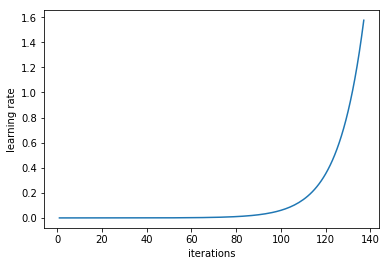

In [39]:
learn.sched.plot_lr()

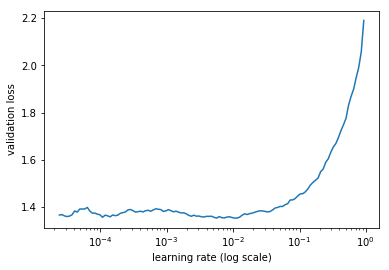

In [40]:
learn.sched.plot()

## Increase size

In [33]:
# Starting training on small images for a few epochs, then switching to bigger images, and continuing training is an amazingly effective way to avoid overfitting.

# http://forums.fast.ai/t/planet-classification-challenge/7824/96
# set_data doesn’t change the model at all. It just gives it new data to train with.
learn.set_data(get_data(299, 80)) 
learn.freeze()

#Source:   
#    def set_data(self, data, precompute=False):
#        super().set_data(data)
#        if precompute:
#            self.unfreeze()
#            self.save_fc1()
#            self.freeze()
#            self.precompute = True
#        else:
#            self.freeze()
#File:      ~/fastai/courses/dl1/fastai/conv_learner.py

In [34]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 299, 299]),
                           ('output_shape', [-1, 64, 150, 150]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 150, 150]),
                           ('output_shape', [-1, 64, 150, 150]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 150, 150]),
                           ('output_shape', [-1, 64, 150, 150]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 150, 150]),
                           ('output_shape', [-1, 64, 75, 75]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 75, 

In [35]:
learn.freeze()

In [43]:
learn.fit(5e-3, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                   
    0      1.626417   1.426835   0.503524  
    1      1.595296   1.415666   0.511013                   
    2      1.552414   1.397453   0.514097                   


[array([1.39745]), 0.514096918203232]

Validation loss is much lower than training loss. This is a sign of underfitting. Cycle_len=1 may be too short. Let's set cycle_mult=2 to find better parameter.

In [36]:
# When you are under fitting, it means cycle_len=1 is too short (learning rate is getting reset before it had the chance to zoom in properly).
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2) # 1+2+4 = 7 epochs

epoch      trn_loss   val_loss   accuracy                   
    0      1.515581   1.383625   0.522026  
    1      1.507568   1.370226   0.519383                   
    2      1.471789   1.36212    0.52467                    
    3      1.465919   1.36207    0.522026                   
    4      1.451652   1.337367   0.533921                   
    5      1.427047   1.333412   0.53304                    
    6      1.415496   1.328908   0.531278                   



[array([1.32891]), 0.531277537477174]

Training loss and validation loss are getting closer and smaller. We are on right track.

In [37]:
log_preds, y = learn.TTA() # (5, 2044, 120), (2044,)
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y), metrics.log_loss(y, probs)

(0.5330396475770925, 1.3259945803139326)

In [38]:
len(data.val_ds.y), data.val_ds.y[:5]

(2270, array([9, 9, 9, 9, 9]))

In [39]:
learn.save('299_pre_bs80')

In [40]:
learn.load('299_pre_bs80')

In [41]:
learn.fit(1e-2, 1, cycle_len=2) # 1+1 = 2 epochs

epoch      trn_loss   val_loss   accuracy                   
    0      1.437424   1.327512   0.537445  
    1      1.412686   1.320846   0.529956                   



[array([1.32085]), 0.5299559487645321]

In [42]:
learn.save('299_pre_bs80')

In [43]:
learn.load('299_pre_bs80')

In [44]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y), metrics.log_loss(y, probs)

(0.5259911894273128, 1.3275131736628687)

In [45]:
learn.unfreeze()

In [49]:
lr=np.array([5e-5,5e-4,5e-3])

In [51]:
learn.set_data(get_data(299, 48)) 

 85%|████████▍ | 193/228 [01:58<00:20,  1.67it/s, loss=5.47]

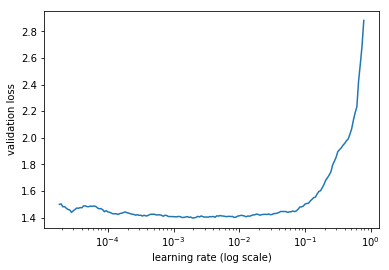

In [48]:
lrf=learn.lr_find()
learn.sched.plot()

In [52]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.448863   1.311074   0.534361  
    1      1.405124   1.303028   0.538767                   
    2      1.396005   1.306464   0.535683                   
    3      1.402845   1.303234   0.547137                   
    4      1.372364   1.297798   0.544934                   
    5      1.342952   1.290582   0.542731                   
    6      1.379837   1.28929    0.546696                   


[array([1.28929]), 0.5466960388395755]

In [53]:
learn.save('299_unfroze_bs48')

In [54]:
learn.load('299_unfroze_bs48')

In [ ]:
learn.fit(lr, 10, cycle_len=1, cycle_mult=2)

 27%|██▋       | 51/190 [00:36<01:35,  1.45it/s, loss=1.38]

This dataset is so similar to ImageNet dataset. Training convolution layers doesn't help much. We are not going to unfreeze.

## Create submission

https://youtu.be/9C06ZPF8Uuc?t=1905

In [ ]:
data.classes

In [ ]:
data.test_ds.fnames

In [ ]:
log_preds, y = learn.TTA(is_test=True) # use test dataset rather than validation dataset
probs = np.mean(np.exp(log_preds),0)
#accuracy_np(probs, y), metrcs.log_loss(y, probs) # This does not make sense since test dataset has no labels

In [ ]:
probs.shape # (n_images, n_classes)

In [ ]:
df = pd.DataFrame(probs)
df.columns = data.classes

In [ ]:
df.insert(0, 'id', [o[5:-4] for o in data.test_ds.fnames])

In [ ]:
df.head()

In [ ]:
SUBM = f'{PATH}/subm/'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(f'{SUBM}subm.gz', compression='gzip', index=False)

In [ ]:
FileLink(f'{SUBM}subm.gz')

## Individual prediction

In [ ]:
fn = data.val_ds.fnames[0]
fn

In [ ]:
Image.open(PATH + fn).resize((150, 150))

In [ ]:
# Method 1.
trn_tfms, val_tfms = tfms_from_model(arch, sz)
ds = FilesIndexArrayDataset([fn], np.array([0]), val_tfms, PATH)
dl = DataLoader(ds)
preds = learn.predict_dl(dl)
np.argmax(preds)

In [ ]:
learn.data.classes[np.argmax(preds)]

In [ ]:
# Method 2.
trn_tfms, val_tfms = tfms_from_model(arch, sz)
im = val_tfms(open_image(PATH + fn)) # open_image() returns numpy.ndarray
preds = learn.predict_array(im[None])
np.argmax(preds)